# Классификация

классификация – отнесение объекта к одной из категорий на основании его признаков

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.simplefilter("ignore")

In [2]:
df_train = pd.read_csv('titnic_data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv('titnic_data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Отбор данных и заполнение пропусков
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

X_train = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y_train = df_train['Survived']
                   
X_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=40)

-------------

# Дерево решений

In [7]:
from sklearn import tree

Дерево решений — это ациклический граф, который можно использовать для принятия решений. В каждом ветвящемся узле графа исследуется j-й признак из вектора признаков. Если значение признака ниже определенного порога, выби- рается левая ветвь; иначе — правая. По достижении листового узла принимается решение о классе, к которому относится образец.

В основе популярных алгоритмов построения дерева решений, таких как ID3 и C4.5, лежит принцип жадной максимизации прироста информации – на каждом шаге выбирается тот признак, при разделении по которому прирост информации оказывается наибольшим. Дальше процедура повторяется рекурсивно, пока энтропия не окажется равной нулю или какой-то малой величине (если дерево не подгоняется идеально под обучающую выборку во избежание переобучения). В разных алгоритмах применяются разные эвристики для "ранней остановки" или "отсечения", чтобы избежать построения переобученного дерева

Критерии:
- Энтропия
- Неопределенность Джини
- Ошибка классификации (misclassification error)

Пример работы критерия прироста информации


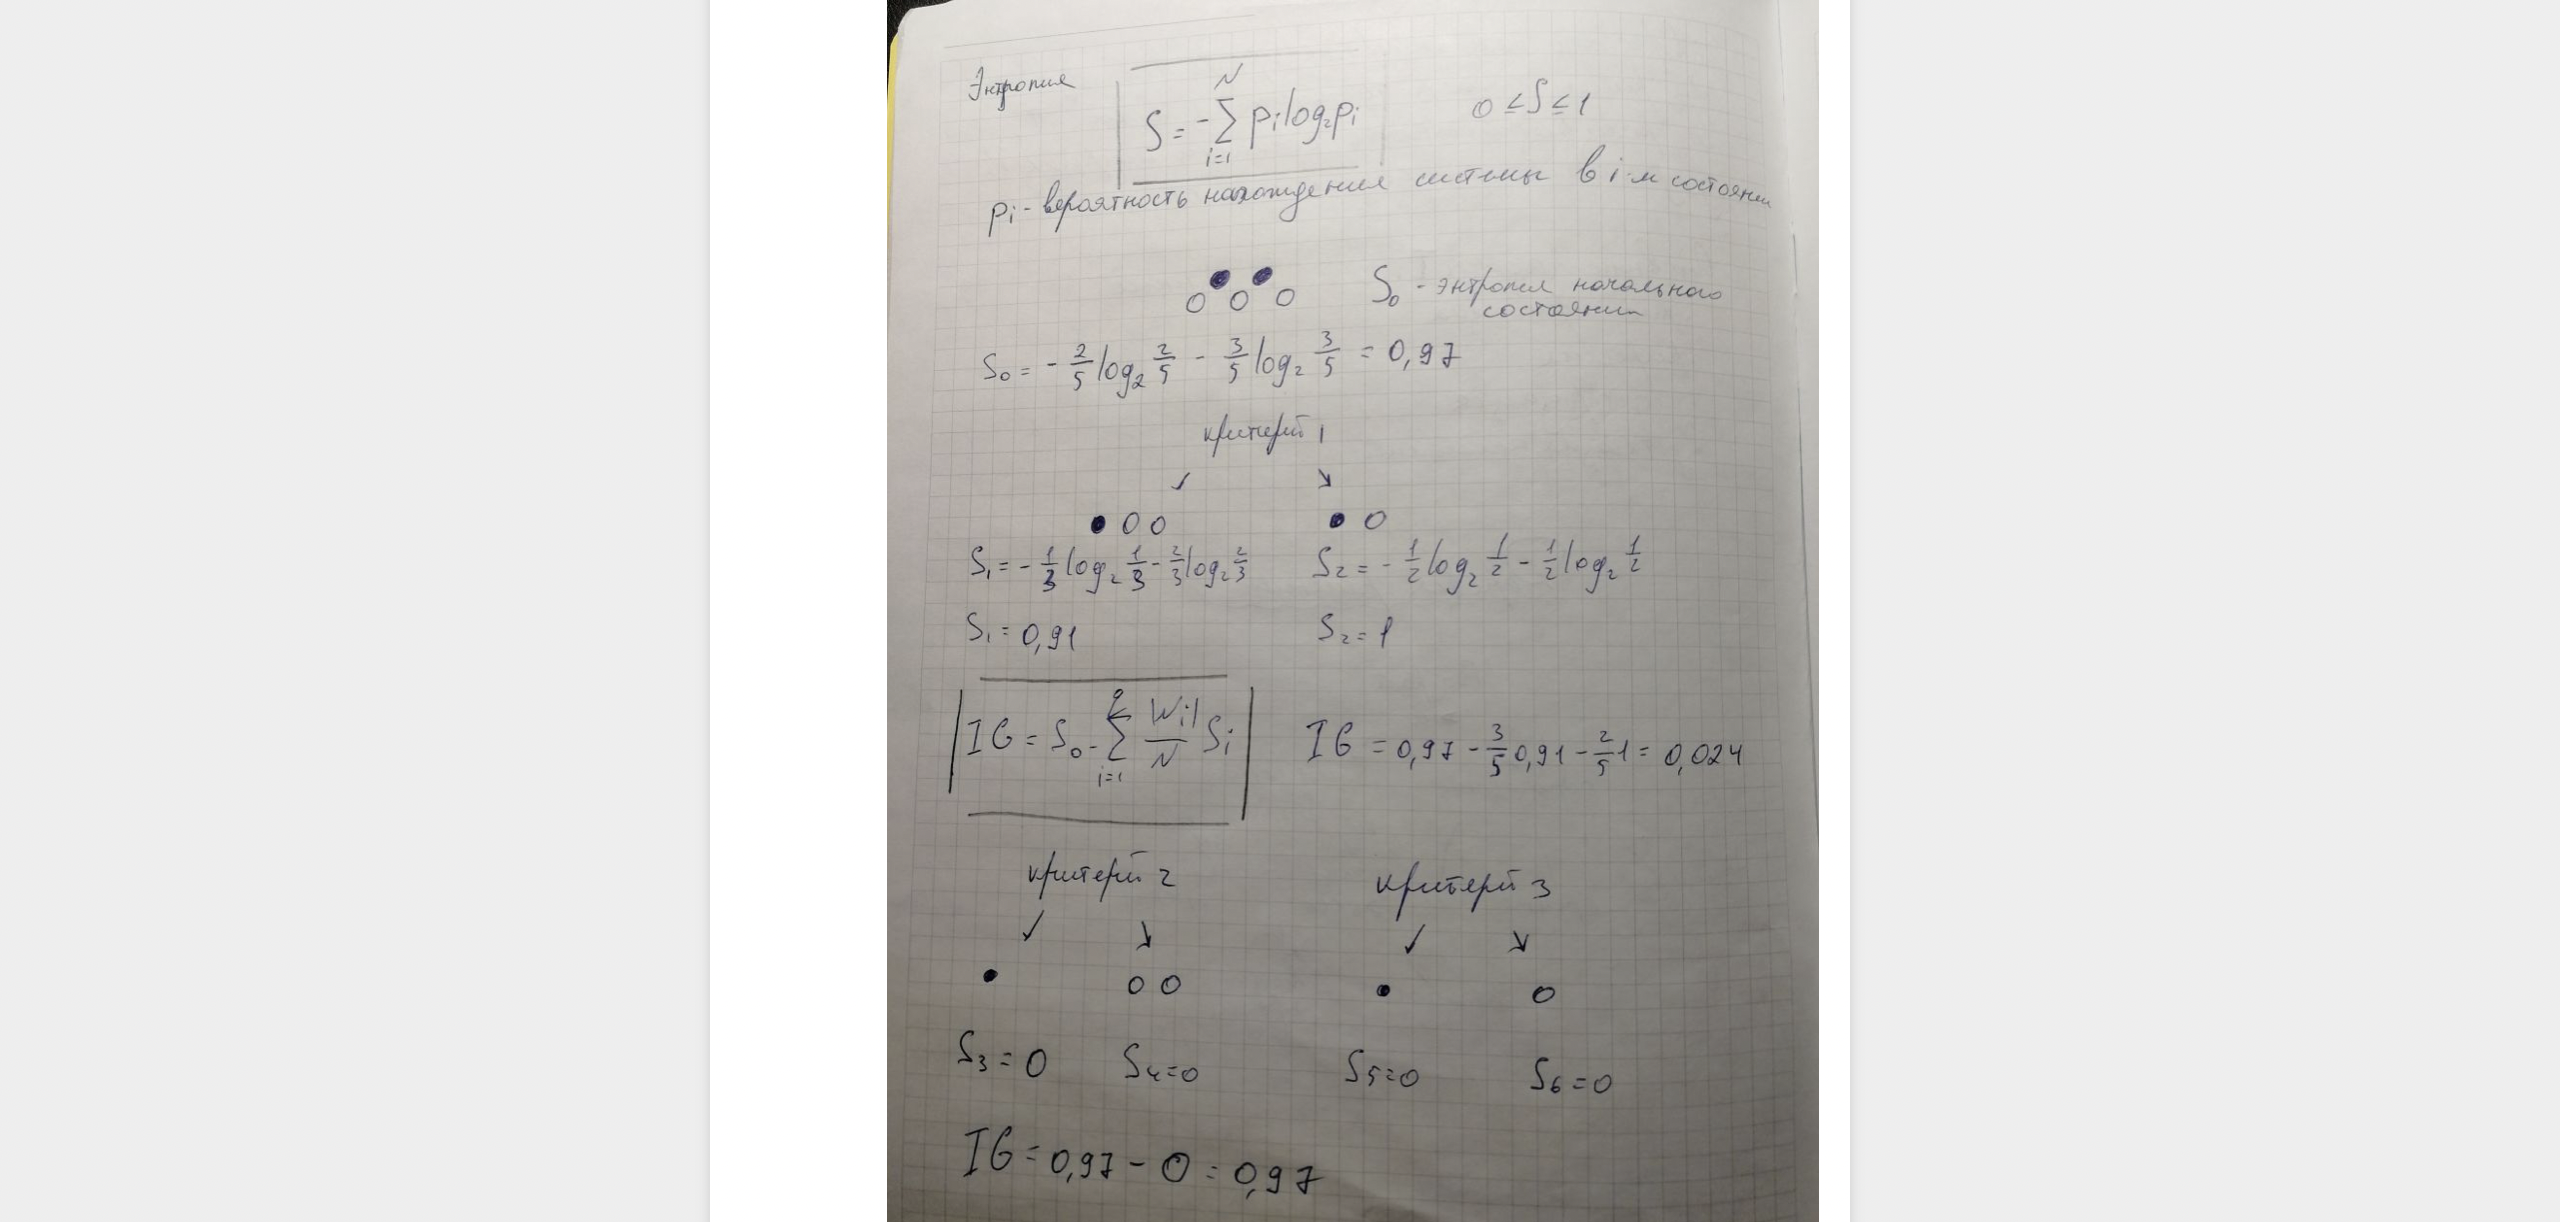

In [8]:
clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

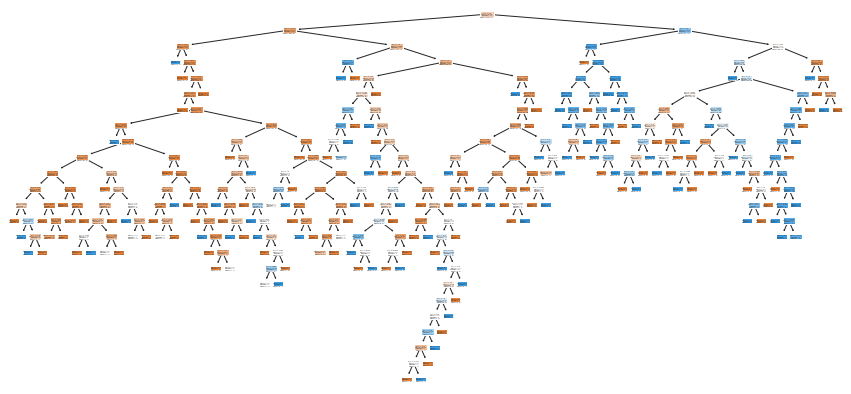

In [54]:
plt.figure(figsize=(15, 7))
tree.plot_tree(clf, filled=True);

In [10]:
clf.score(x_val, y_val)

0.7932960893854749

#### Проблема переобучения дерева
Варианты борьбы:
- Искусственное ограничение глубины дерева 
- Стрижка дерева

Основные параметры DecisionTreeClassifier:
- criterion{“gini”, “entropy”}, default=”gini”
- max_depth int, default=None\
Максимальная глубина - является гиперпараметром (как раз для ограничения глубины дерева)
    
- min_samples_leaf int or float, default=1\
Минимельное количество элементов в листе (можем увеличивать, чтобы алгоритм не разделял на более мелкие фракции)
    
- max_features int, float or {“auto”, “sqrt”, “log2”}, default=None\
количесвто фичей, которые учитываются для поиска лучшего разделения 
    
- random_state
    случайное положение для возможности повтора эксперемента


max score = 0.849
criterion=gini    max_depth=4    min_samples_leaf=3
criterion=gini    max_depth=4    min_samples_leaf=4


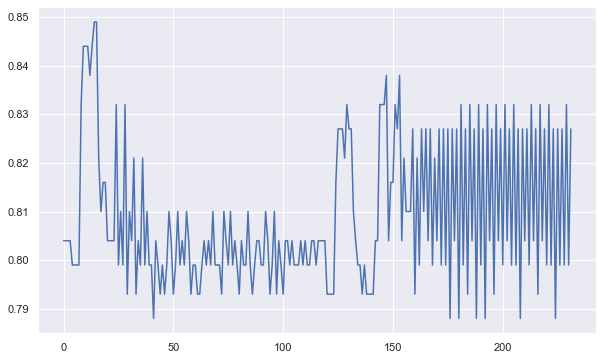

In [10]:
# дерево переобучилось
# сделаем перебор параметров
crit = ['gini', 'entropy']
depth = list(range(1,30))
leaf = list(range(1,5))

score_dict = {}

for cr in crit:
    for d in depth:
        for l in leaf:
            clf = tree.DecisionTreeClassifier(criterion=cr, max_depth=d, min_samples_leaf=l)
            clf.fit(x_train, y_train)
            score = clf.score(x_val, y_val)
            score = round(score.tolist(), 3)
            score_dict[f'criterion={cr}    max_depth={d}    min_samples_leaf={l}'] = score
            
max_score = max(score_dict.values())
print(f'max score = {max_score}')

for i in score_dict:
    if score_dict[i] == max_score:
        print(i)
plt.figure(figsize=(10, 6))
plt.plot(range(len(score_dict)), score_dict.values())
plt.show()

In [6]:
# Тоже самое но с помощью GridSearchCV
from sklearn.model_selection import GridSearchCV 

In [6]:
clf = tree.DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 'max_depth': range(1,30), 'min_samples_leaf':range(1,5)}
grid_clf = GridSearchCV(clf, params, n_jobs=-1)
grid_clf.fit(x_train, y_train)

print('Оценка на x_train, y_train')
print(grid_clf.best_score_)
print(grid_clf.best_params_)

Оценка на x_train, y_train
0.8202304737516004
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3}


In [7]:
# Будем делать кросс валидацию
from sklearn.model_selection import cross_val_score

In [7]:
cvs = cross_val_score(grid_clf, X_train, Y_train, cv=10)
print(cvs)
print(np.mean(cvs))

[0.74444444 0.83146067 0.74157303 0.88764045 0.86516854 0.7752809
 0.79775281 0.7752809  0.86516854 0.84269663]
0.8126466916354556


### Плюсы дерева решений 
- интерпретируемость 
- возможность визуализации
- быстрота 

### Минусы дерева решений 
- Чувствительность к шуму 
- Переобучаемость 
- Слишком четкие границы разделения 

-------------

# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

Случайный лес — модель, состоящая из множества деревьев решений. 
Вместо того,чтобы просто усреднять прогнозы разных деревьев (такая концепция называется просто «лес»), эта модель использует две ключевые концепции, которые и делают этот лес случайным.

- Случайная выборка образцов из набора данных при построении деревьев.
- При разделении узлов выбираются случайные наборы параметров.

In [11]:
clf_RF = RandomForestClassifier(criterion='entropy')
clf_RF.fit(x_train, y_train)
clf_RF.score(x_val, y_val)

0.7932960893854749

Без подбора гиперпараметров результат получился не сильно лучше чем при обычном дереве решений

max score = 0.872
n_estimators=7, criterion=entropy, max_depth=13, min_samples_leaf=3


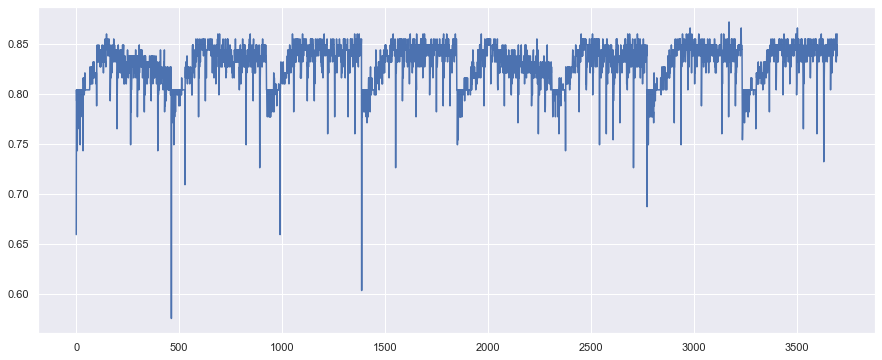

CPU times: user 3min 31s, sys: 1min 25s, total: 4min 56s
Wall time: 3min 22s


In [25]:
%%time
# сделаем перебор параметров
crit = ['gini', 'entropy']
estim = range(1, 100, 3)
depth = range(1,15)
leaf = range(1,5)

score_dict = {}

for cr in crit:
    for l in leaf:
        for d in depth:
            for n in estim:
                clf = RandomForestClassifier(n_estimators=n, criterion=cr, max_depth=d, min_samples_leaf=l, n_jobs=-1)
                clf.fit(x_train, y_train)
                score = clf.score(x_val, y_val)
                score = round(score.tolist(), 3)
                score_dict[f'n_estimators={n}, criterion={cr}, max_depth={d}, min_samples_leaf={l}'] = score

max_score = max(score_dict.values())
print(f'max score = {max_score}')

for i in score_dict:
    if score_dict[i] == max_score:
        print(i)
plt.figure(figsize=(15, 6))
plt.plot(range(len(score_dict)), score_dict.values())
plt.show()

Даже с учетом подбора гиперпараметров не получилось сильно обойти резуьтат обычного решающего дерева

Однако по графику можно сказать что в целом эффективность при подборе параметров выше чем у дерева решений

При лучшей предобработке данных можно было бы получить гораздо более высокий результат

------------

# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

Задача алгоритма - найти ближайшие экземпляры для определения класса объекта 

Пример работы алгоритма в 2-n пространстве 

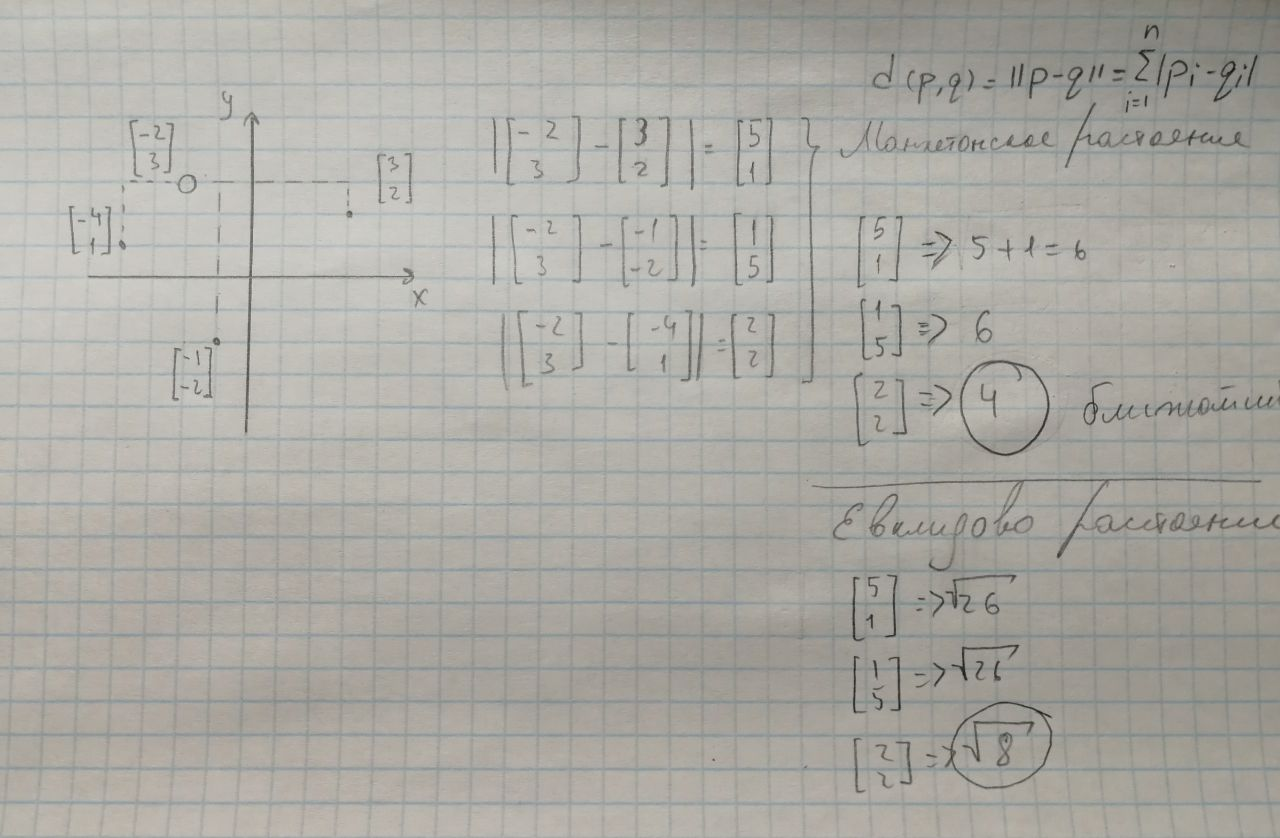

Основные параметры KNeighborsClassifier
- n_neighbors:\
Количесвто ближайших соседей, метки которых будут учитываться для результата вывода алгоритма

- weights:\
"uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция

- algorithm:\
"brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем - расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.

- leaf_size:\
Порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей

- metric:\
"minkowski", "manhattan", "euclidean", "chebyshev" и другие

In [13]:
clf_KNN = KNeighborsClassifier()
clf_KNN.fit(x_train, y_train)
clf_KNN.score(x_val, y_val)

0.7150837988826816

max score = 0.804
n_neighbors=3    metric=manhattan    weights=uniform


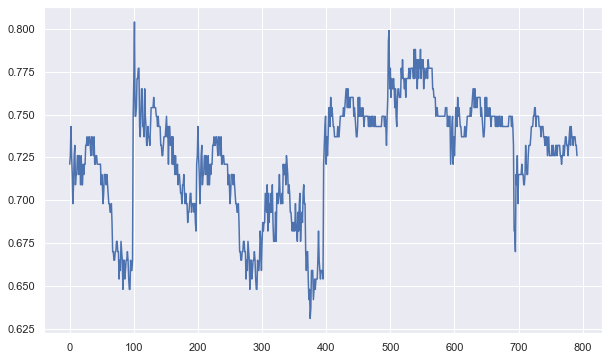

CPU times: user 4.97 s, sys: 681 ms, total: 5.65 s
Wall time: 4.73 s


In [17]:
%%time
neig = range(1, 100)
metrics = ["minkowski", "manhattan", "euclidean", "chebyshev"]
weig = ['uniform', 'distance']

score_dict = {}

for w in weig:
    for m in metrics:
        for n in neig:
            clf = KNeighborsClassifier(n_neighbors=n, metric=m, weights=w ,n_jobs=-1)
            clf.fit(x_train, y_train)
            score = clf.score(x_val, y_val)
            score = round(score.tolist(), 3)
            score_dict[f'n_neighbors={n}    metric={m}    weights={w}'] = score
            
max_score = max(score_dict.values())
print(f'max score = {max_score}')

for i in score_dict:
    if score_dict[i] == max_score:
        print(i)
plt.figure(figsize=(10, 6))
plt.plot(range(len(score_dict)), score_dict.values())
plt.show()

### Плюсы KNN 
- интерпретируемость 
- простая реализция 

### Минусы KNN 
- Зависимость от выбранной метрики 
- Требует предобратоки данных(нормализация, стандартизация)

----

# Модель наивного Байеса 

In [27]:
from sklearn.naive_bayes import GaussianNB

В основе алгоритма стоит формула Байеса 

$$ p(x|y) = {p(x,y) \over p(y)} $$
p(x|y) - вероятность что x произойдет при условии что y произошло\
p(x,y) - совместная вероятность что x и y произойдут

$$ p(x,y) = p(x|y)p(y) = p(y|x)p(x) $$


$$ p(x|y) = {p(y|x)p(x) \over p(y)} - Формула\ Байеса$$
----

Пример формулы для спама:
$$ p(spam|word) = {p(word|spam)p(spam) \over p(word)} $$

На полноценном датафрейме формула выглядит так:
$$ p(y|x_{1}, ... x_{n}) = {p(x_{1}, ... x_{n}|y)p(y) \over p(x_{1}, ... x_{n})} $$
$$ p(x_{1}, ... x_{n}|y) = p(x_{1}|y)*p(x_{2}|y)...p(x_{n}|y) $$

При работе классификатора алгоритм высчитывает по формуле Байеса вероятность отнесения экземпляра к каждой категории и выдает ответ на основе большей вероятности

In [28]:
clf_NB = GaussianNB()
clf_NB.fit(x_train, y_train)
clf_NB.score(x_val, y_val)

0.8100558659217877

-------

# SVM

In [33]:
from sklearn.svm import SVC

Алгоритм находит крайние случаи классов и проводит между ними плоскости таким образом, чтобы расстояние до этих экземпляров было минимальным

Основные параметры SVC
- kernel\
‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
- degree\
степень полиноминальной функции 
- gamma\
коэффициент для ‘rbf’, ‘poly’ and ‘sigmoid’.
- probability\
Использование вероятности\

Включает множество других параметров

In [35]:
clf_SVM = SVC(kernel='linear')
clf_SVM.fit(x_train, y_train)
clf_SVM.score(x_val, y_val)

0.8044692737430168

In [42]:
clf_SVM = SVC(kernel='poly', degree=10)
clf_SVM.fit(x_train, y_train)
clf_SVM.score(x_val, y_val)

0.6536312849162011

----


# Логистическая регрессия
Хоть этот алгоритм имеет в названии слово 'регрессия', он является частным случаем линейного классияикатора 
Суть алгоритма - прогнозирование вероятности 

1) Вычисляем  $w^Tx$\
2) Находим логарифм $log(OR_+) = w^Tx$\
3) Вычисляем вероятность отнесения к классу "+"\
$p_+ = OR_+ /(1+OR_+) = 1/(1+exp^{-w^Tx})$


In [8]:
from sklearn.linear_model import LogisticRegression

In [46]:
clf_LOG = LogisticRegression()
clf_LOG.fit(x_train, y_train)
clf_LOG.score(x_val, y_val)

0.8156424581005587

In [53]:
print(list(range(0, 10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
